Logistic Regressor

Logistic Regressor is a machine learning algorithm to classfication problems, such as: e-mail classification (spam, not spam), online transactions (fraud or not), etc.

For a two class problem we have y belongs to (1, 0), the 0 we call "Negative class" and the 1 we call "positive class". For convention, we generally use 0 as the abscence of a feature we are looking for and 1 for the presence of the feature. In a tumor classificantion, for instance, we would have 0 as benign (Negative class) and 1 would be malignant (Positive class). 

If we try to fit a straight line in a two class calssification problem, we could use a threshold in 0.5, for instance, so if the hypothesis is greater than 0.5 we would classify as positive and if is less than 0.5 we classify as negative class. But, we have a problem, if we use linear regression the algorithm could predict values much larger than 1 and much smaller than 0. And, the outliers could change the threshold and make the algorithm give poor predctions.

So, since we have this problems with linear regression we are going to use another algorithm in this classification problem, we are going to use the logistic regression. The first important property of this algorithm is that the logistic always predict values between 0 and 1. The hypothesis for this algorithm would be:
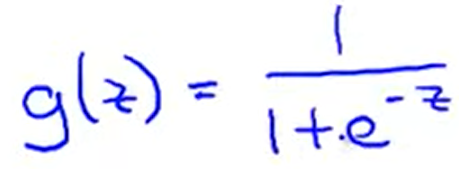
Wich is the Sigmoid function or the logistic function.
So, our hypothesis look like this:
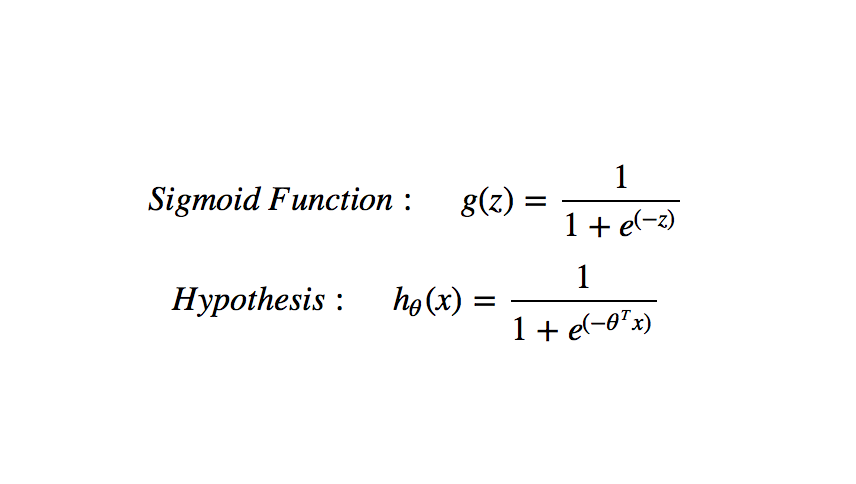

The hypothesis in this case returns (based on the input) the probability that this input belongs to the positive class.
For example, lets supose we are checking a tumor as malignant or benign using the size as feature, if the hypothesis calculated in the size of the tumor gives us the value 0.7 the pacient has 70% of chance of having a malignant tumor. We also can say that the hypothesis is: h(x) = p(y=1|x;theta) (this is read that way: the probability of y equals to 1 given x parameterized by theta).

A decision boundary is the region of a problem space that delimite the positive class and the negative class. SO, based on what we discussed in the linear regression algorithm for classification problem, we can set a threshold, where if h(x) >= 0.5, y=1 and, if h(x) < 0.5, y=0. So we know that h(x) is equal to one when theta times x is >= 0 and zero if the opposite.

The sigmoid function g(z) has the graph that we can see bellow:
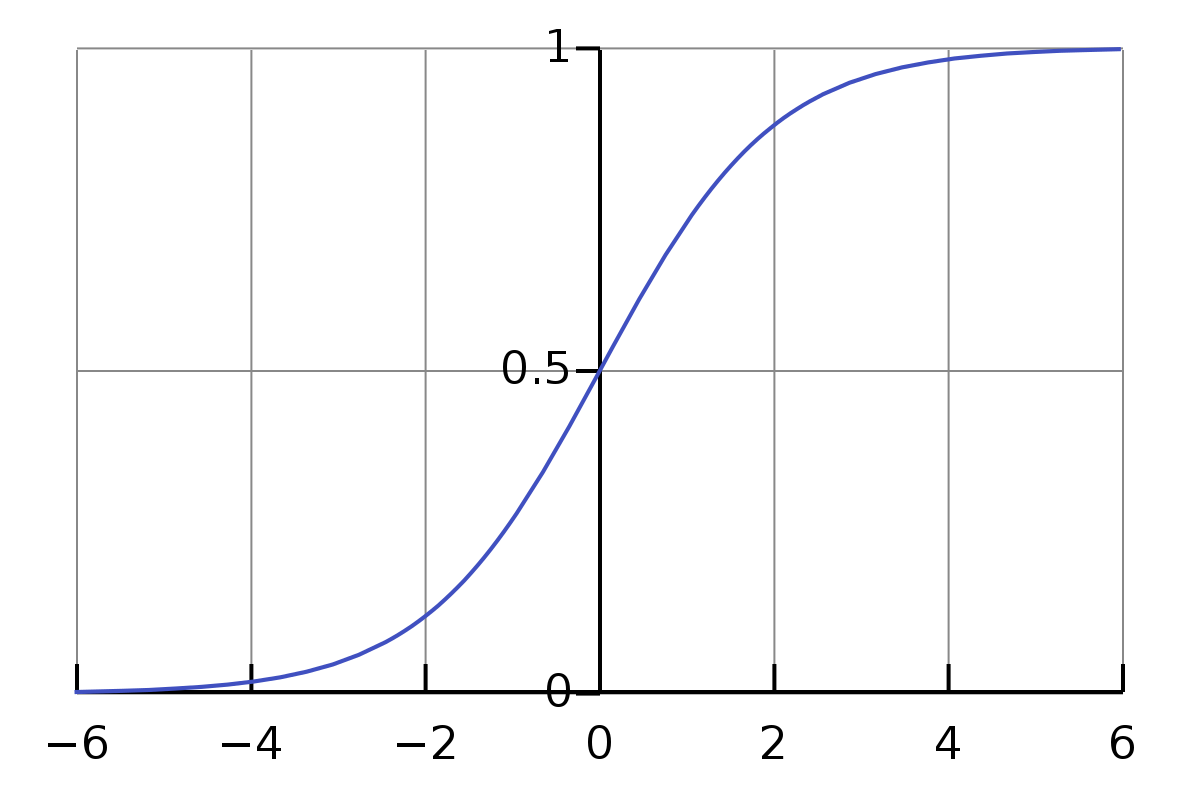
So, we can see that, for z >= 0 the sigmoid predicts y = 1.
And, for z < 0, the sigmoid predicts y = 0.
Once that our Hypothesis is h(x) = g(AX), we have:
For, AX >= 0, sigmoid predicts y = 1.
And for AX < 0, sigmoid predicts y = 0.
So, we can see that our decisions boundaries it can be represented as AX = 0.

So, going to the algorithm itself, if we use the MSE we would have a problem, because our hypothesis is a non linear function so, we would end up in a non-convex cost function (it would have a lot of local minumuns and would be hard to know if we find the optimal answer). So our cost function for this problem would be:
Cost(h(x), y) = -log(h(x)) if y = 1 and -log(1 - h(x)) if y = 0.
So, why we choose this complicated function?
Well, first of all, if we will analyze the y = 1 case:
For this case, if h(x) = 1 the cost is equal to 0, and the limit of h(x) -> 0 the Cost -> infinite. As we can see in the image bellow:
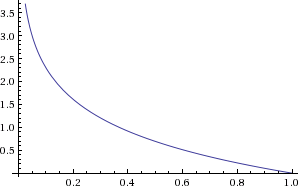
Now, we analyze the y = 0 case. If h(x) = to 0 the cost of this function it is going to be 0, but, as close as it gets of 1 the cost becomes as greater as it wants. As, you can see bellow:
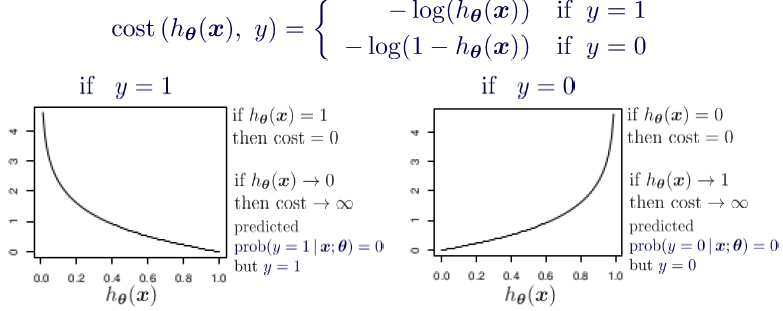
We also can sumarize this cost function as: Cost(h(x), y) = -y * log(h(x)) - (1 - y) * log(1 - h(x)), this is true because, when y = 1, the right side of the equation equals to 0 and we remain with -log(h(x)) and when y = 0, the left side of the equation it is equal to zero and remain -log(1-h(x)). But, this cost function that we calculated is for one especific entry, to calculate the error of the role set we have sum these errors, so we have:
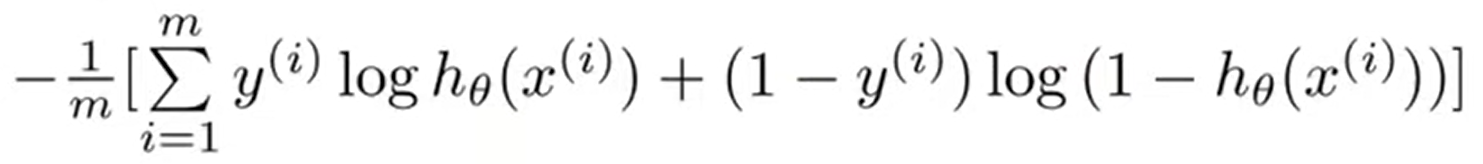

In order to minimize this cost function we are going to use gradient descent.
The derivative of this cost function (called Cross Entropy) is:
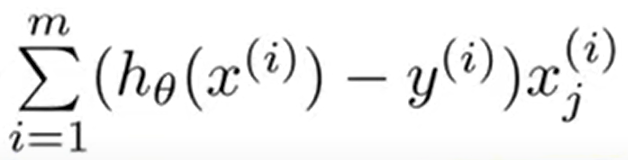

In [83]:
#logistic regressor code
#hypotesis h(x) = 1/(1+e^-(ax+b))
import pandas as pd
import numpy as np
import random
import math

class Classifier():
    def __init__(self, step, n_ite):
        self.step = step
        self.n_ite = n_ite
        
    def fit(self, X_train, Y_train):
        size = X_train.shape[1] + 1
        np.random.seed(size)
        self.B = np.random.rand(size, 1)
        X_train = np.hstack((X_train, np.ones((X_train.shape[0], 1))))
        for i in range(self.n_ite):
            hx = sigmoid(X_train, self.B)
            self.B = self.B - self.step * np.dot(X_train.transpose(), (hx - Y_train))
    
    def predict_proba(self, X):
        X = np.hstack((X, np.ones((X.shape[0], 1))))
        return (sigmoid(X, self.B))
    
    def predict(self, X):
        X = np.hstack((X, np.ones((X.shape[0], 1))))
        hx = sigmoid(X, self.B)
        hx[hx >= 0.5] = 1
        hx[hx < 0.5] = 0
        return(hx)
    
def sigmoid(X, B):
    temp = np.dot(X, B)
    temp = np.exp(-(temp))
    hx = 1/(1+temp)
    return(hx)

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

scaler = MinMaxScaler()
df = pd.read_csv('data.csv', usecols=['perimeter_mean', 'area_mean', 'diagnosis'])
df = df.sort_values('diagnosis')
df = df.replace(['B', 'M'], [0, 1])
benign = df[df.diagnosis == 0]
malignant = df[df.diagnosis == 1]
train, test = train_test_split(df)
scaler.fit(train)
test = scaler.transform(test)
train = scaler.transform(train)
Y_train = train[:,0]
Y_train = np.array([Y_train])
Y_train = Y_train.transpose()
X_train = train[:,[1, 2]]
classifier = Classifier(1, 5)
classifier.fit(X_train, Y_train)
print(classifier.predict(X_train))

[[0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.